**Examples**

Drag

In [56]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [57]:
from modsim import *

The Params Object

In [3]:
params = Params(
    mass = 0.25,
    diameter = 0.30,
    rho = 1.5,
    g = 9.5,
    v_init = 0,
    v_term = 20,
    height = 200,
    t_end = 40,
)

In [58]:
from numpy import pi

def make_system(params):
    init = State(y=params.height, v=params.v_init)

    area = pi * (params.diameter/2)**3

    C_d = (1.5 * params.mass * params.g /
           (params.rho * area * params.v_term))

    return System(init=init,
                  area=area,
                  C_d=C_d,
                  mass=params.mass,
                  rho=params.rho,
                  g=params.g,
                  t_end=params.t_end)

In [59]:
system = make_system(params)
system.C_d

11.199792291651898

In [60]:
paramb = params.set(v_term=25)
systemb = make_system(paramb)
systemb.C_d

8.959833833321518

Simulating the Penny Drop

In [61]:
def slope_func(t, state, system):
    y, v = state
    rho, C_d, area = system.rho, system.C_d, system.area
    mass, g = system.mass, system.g

    f_drag = rho * v * C_d * area / 4
    a_drag = f_drag / mass
    dydt = v
    dvdt = -g + a_drag

    return dydt, dvdt

slope_func(0, system.init, system)

def event_func(t, state, system):
    y, v = state
    return y

results, details = run_solve_ivp(system, slope_func, events=event_func)
details.message

'A termination event occurred.'

In [62]:
results.tail()

,y,v
2.786835,1.179508e+01,-99.998932
2.815864,8.881061e+00,-100.793771
2.844894,5.943957e+00,-101.592723
2.873923,2.983644e+00,-102.395810
2.902953,-1.421085e-14,-103.203052


In [63]:
tq = results.index[-1]
tq

2.902952817866472

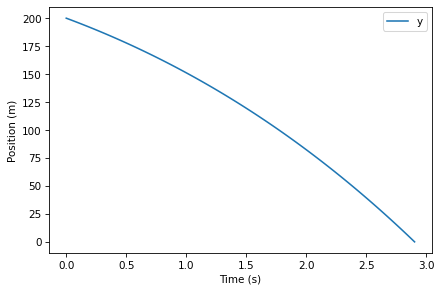

In [64]:
def plot_position(results):
    results.y.plot()
    decorate(xlabel='Time (s)', ylabel='Position (m)')

plot_position(results)

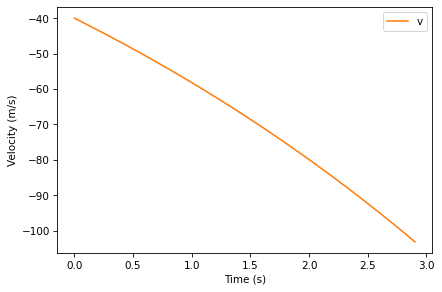

In [65]:
def plot_velocity(results):
    results.v.plot(color='C1', label='v')
    decorate(xlabel='Time (s)', ylabel='Velocity (m/s)')

plot_velocity(results)

**Exercises**

Exercise 1

In [66]:
params = params.set(v_init=-40)
systemb = make_system(params)
results2, details2 = run_solve_ivp(systemb, slope_func, events=event_func)
details2.message

'A termination event occurred.'

In [67]:
tq = results2.index[-1]
tq

2.902952817866472

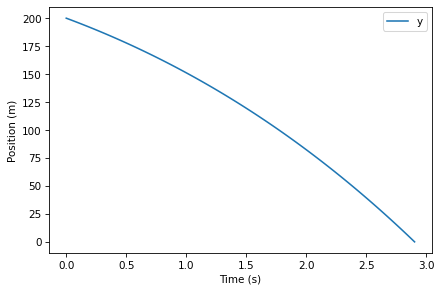

In [68]:
plot_position(results2)

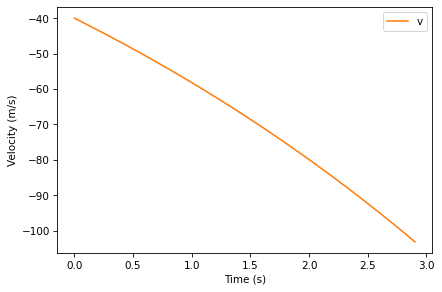

In [69]:
plot_velocity(results2)

Exercise 2

In [70]:
params_quarter = params.set(
    mass = 0.50,
    diameter = 0.245,
    flight_time = 25,
)
systemc = make_system(params_quarter)
results3, details3 = run_solve_ivp(systemc, slope_func, events=event_func)
details3.message

'A termination event occurred.'

In [71]:
tq = results3.index[-1]
tq

2.9029528178664754

In [72]:
def error_func(guess, params):
    print(guess)
    params = params.set(v_term=guess)
    system = make_system(params)
    results, details = run_solve_ivp(system, slope_func, events=event_func)
    tq = results.index[-1]
    error = tq - params.flight_time
    return error
v_guess1 = -2
error_func(v_guess1, params_quarter)

-2


8.850769257891002

In [73]:
v_guess2 = 1
error_func(v_guess2, params_quarter)

1


-24.190594067804515